In [1]:
import init
import sys
import os
import constants as cn
import pandas as pd
import geopandas as gpd
import shapely
import fiona
from fiona.crs import from_epsg
from matplotlib import path
from shapely.geometry import Point
import numpy as np
%matplotlib inline

In [ ]:
#Include a comment paragraph about the data structure, how it was implemented

In [4]:
os.getcwd()

'/Users/hyeonjeongkim/Desktop'

In [7]:
DATADIR = os.path.join(os.getcwd(), '/Users/hyeonjeongkim/dssg/Seattle-Mobility-Index/seamo/data/raw/shapefiles/')

In [124]:
blkgrp = gpd.read_file(os.path.join(DATADIR, "blkgrp10_shore.shp"))
blkgrp = blkgrp.loc[:, ('GEO_ID_GRP','geometry')]
blkgrp = blkgrp.to_crs({'init' :'epsg:4326'})
blkgrp.rename(columns={blkgrp.columns[0]: 'keys'}, inplace = True)
blkgrp['Name'] = str('Block Group')

blkgrp.shape

(1422, 3)

In [125]:
blkgrp.head()

,keys,geometry,Name
0,530330001001,POLYGON ((-122.2841872052759 47.73360555151095...,Block Group
1,530330001002,POLYGON ((-122.2897518162644 47.73373385941476...,Block Group
2,530330001003,POLYGON ((-122.2895587836067 47.72644986052015...,Block Group
3,530330001004,POLYGON ((-122.2924338167398 47.73375285274882...,Block Group
4,530330001005,POLYGON ((-122.2922647847798 47.72647585486412...,Block Group


In [126]:
#https://data.seattle.gov/dataset/Neighborhoods/2mbt-aqqx

nbhd = gpd.read_file(os.path.join(DATADIR, "Neighborhoods.shp"))
nbhd_short = nbhd.loc[:, ('S_HOOD', 'geometry')]
nbhd_long = nbhd.loc[:, ('L_HOOD', 'geometry')]

nbhd_short.rename(columns={nbhd_short.columns[0]: 'keys'}, inplace = True)
nbhd_long.rename(columns={nbhd_long.columns[0]: 'keys'}, inplace = True)

nbhd_short['Name'] = str('Neighborhood Short')
nbhd_long['Name'] = str('Neighborhood Long')


In [127]:
zipcode = gpd.read_file(os.path.join(DATADIR, "zipcode.shp"))
zipcode = zipcode.loc[:, ('ZIPCODE','geometry')]
zipcode = zipcode.to_crs({'init' :'epsg:4326'})
zipcode.rename(columns={zipcode.columns[0]: 'keys'}, inplace = True)
zipcode['Name'] = str('Zipcode')

In [128]:
scc = gpd.read_file(os.path.join(DATADIR, "sccdst.shp"))
scc = scc.loc[:, ('SCCDST','geometry')]
scc = scc.to_crs({'init' :'epsg:4326'})
scc.rename(columns={scc.columns[0]: 'keys'}, inplace = True)
scc['Name'] = str('Council District')

In [129]:
urbanvillage = gpd.read_file(os.path.join(DATADIR, "DPD_uvmfg_polygon.shp"))
urbanvillage = urbanvillage.loc[:, ('UV_NAME','geometry')]
urbanvillage.rename(columns={urbanvillage.columns[0]: 'keys'}, inplace = True)
urbanvillage['Name'] = str('Urban Village')

In [130]:
reference = pd.concat([blkgrp, nbhd_short, nbhd_long, zipcode, scc, urbanvillage])

In [179]:
def geocode(inputfile):
    
    data = pd.read_csv(inputfile)
    
    data['geometry'] = data.apply(lambda x: Point((float(x[1]), float(x[0]))), axis=1)
    data = gpd.GeoDataFrame(data, geometry='geometry')
    data.crs = {'init' :'epsg:4326'}
    
    #reference = pd.read_csv(referencefile)
    #reference = gpd.GeoDataFrame(referece(reference, geometry='geometry')
    #reference.crs = {'init' :'epsg:4326'}
                                 
    df = gpd.sjoin(data, reference, how = 'inner')
    df = df.drop(columns = ['index_right'])
    df = df.sort_values(by='Name')
    #df = df.drop(columns = ['Index'])
    df = pd.DataFrame(df)
    df = df.pivot(columns='Name', values='keys', index ='lat')
    #df.pivot_table(df, index=['lon', 'lat'], columns='Index', values='keys')

    #df = df.transpose()
    
    #df.loc[-2] = lat
    #df.loc[-1] = long
    #df.sort_index(inplace=True) 
    
    labels = pd.DataFrame(columns =['Latitude', 'Longitude', 'Block Group', 'Neighborhood_short', 'Neighborhood_long', 'Zip Code', 'Council District',  'UrbanVillage'])
    
   # labels.loc[1] = df['keys'].tolist()
    
    return (df)

In [180]:

geocode('/Users/hyeonjeongkim/Desktop/test.csv')



Name,Block Group,Council District,Neighborhood Long,Neighborhood Short,Urban Village,Zipcode
lat,,,,,,
47.650955,530330049002,SCC4,NO BROADER TERM,Fremont,Fremont,98103
47.667870,530330047004,SCC6,BALLARD,Adams,Ballard,98107


##### full.tail()

..\data/processed/shapefiles/SeattleCensusBlockGroups.shp


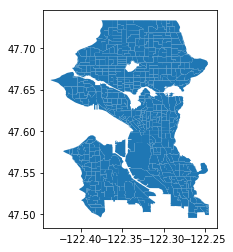

In [14]:
FP = os.path.join(os.pardir, cn.GEN_SHAPEFILE_DIR, 'SeattleCensusBlockGroups.shp')
print(FP)
df = gpd.read_file(FP)
# print(df)
# df = df.to_crs(cn.CRS_EPSG)
gdf = gpd.GeoDataFrame(df.loc[:, (cn.KEY, cn.GEOMETRY)],
            crs=cn.CRS_EPSG, geometry=cn.GEOMETRY)
gdf.plot()

In [7]:
sys.path

['C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/analysis',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/data',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/tests',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/preproc',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/support',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo/core',
 'C:\\Users\\dariu\\DSSG\\SEAMO\\Seattle-Mobility-Index\\seamo',
 '',
 'C:\\Users\\dariu\\Anaconda3\\python35.zip',
 'C:\\Users\\dariu\\Anaconda3\\DLLs',
 'C:\\Users\\dariu\\Anaconda3\\lib',
 'C:\\Users\\dariu\\Anaconda3',
 'C:\\Users\\dariu\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\dariu\\Anaconda3\\lib\\site-packages\\flake8-2.5.1-py3.5.egg',
 'C:\\Users\\dariu\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\dariu\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\dariu\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\dariu\\Anaconda3\\l